Saving infant-mortality-dashboard.csv to infant-mortality-dashboard (1).csv


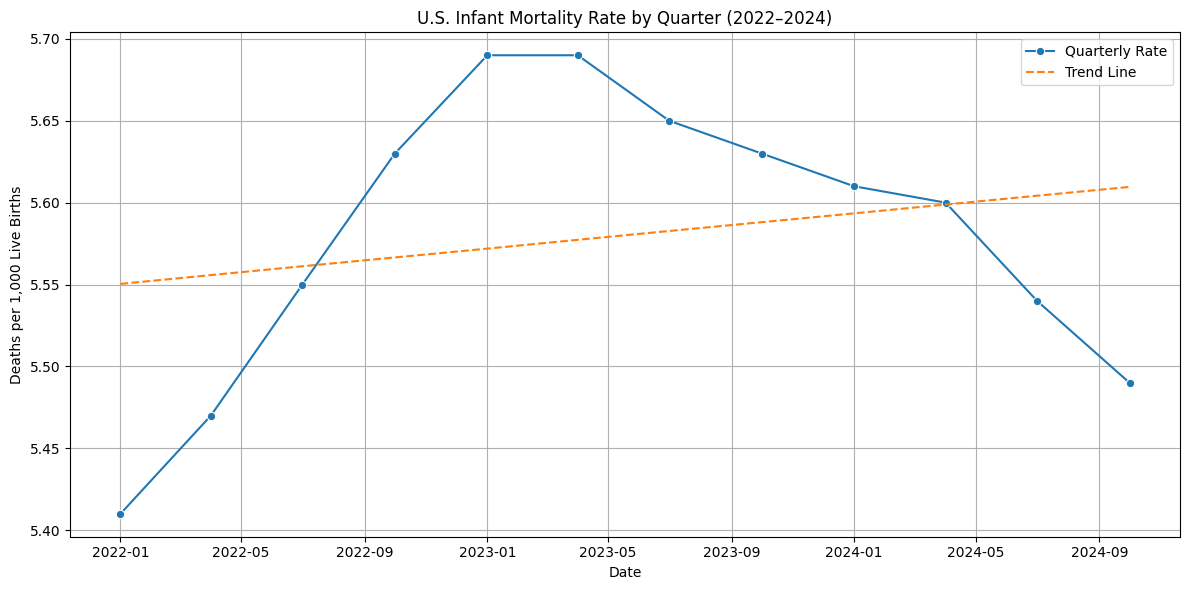

📊 Linear Regression Results:
Slope: 0.0054
Intercept: 5.5504
R-squared: 0.0477
P-value: 0.4955


In [ ]:
# STEP 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

# STEP 3: Load the uploaded CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# STEP 4: MULTIPLE DATA TRANSFORMATIONS

# Convert 'Year and Quarter' to datetime (new column)
def convert_quarter_to_date(qstr):
    year, quarter = qstr.split()
    month = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}[quarter]
    return pd.to_datetime(f"{year}-{month}-01")

df["Date"] = df["Year and Quarter"].apply(convert_quarter_to_date)

# Convert 'Rate' to numeric (if not already)
df["Rate"] = pd.to_numeric(df["Rate"], errors='coerce')

# Rename columns for clarity (optional)
df.rename(columns={"Rate": "Mortality Rate per 1,000 Births"}, inplace=True)

# Drop rows with missing rate values
df.dropna(subset=["Mortality Rate per 1,000 Births"], inplace=True)

# Filter for only 'Infant mortality'
df_filtered = df[df["Indicator"] == "Infant mortality"].copy()

# Reset index for regression
df_filtered.reset_index(drop=True, inplace=True)

# Create an index column for regression
df_filtered["Index"] = df_filtered.index

# STEP 5: STATISTICAL ANALYSIS - Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(
    df_filtered["Index"], df_filtered["Mortality Rate per 1,000 Births"]
)

# Calculate trend line
df_filtered["Trend Line"] = intercept + slope * df_filtered["Index"]

# STEP 6: VISUALIZATION
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Date", y="Mortality Rate per 1,000 Births", marker="o", label="Quarterly Rate")
sns.lineplot(data=df_filtered, x="Date", y="Trend Line", linestyle="--", label="Trend Line")
plt.title("U.S. Infant Mortality Rate by Quarter (2022–2024)")
plt.xlabel("Date")
plt.ylabel("Deaths per 1,000 Live Births")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# STEP 7: DISPLAY STATISTICAL SUMMARY
print("📊 Linear Regression Results:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")


Saving infant-mortality-dashboard.csv to infant-mortality-dashboard (2).csv
📊 Descriptive Statistics (Infant Mortality Rate):
count    12.000000
mean      5.580000
std       0.088933
min       5.410000
25%       5.527500
50%       5.605000
75%       5.635000
max       5.690000
Name: Rate, dtype: float64

Median: 5.605
Standard Deviation: 0.08893306982833174

🧪 Inferential Statistics (One-sample t-test):
Mean Mortality Rate: 5.58
T-statistic: 22.5920
P-value: 0.0000
95% Confidence Interval for Mean: (np.float64(5.523494623230041), np.float64(5.636505376769957))


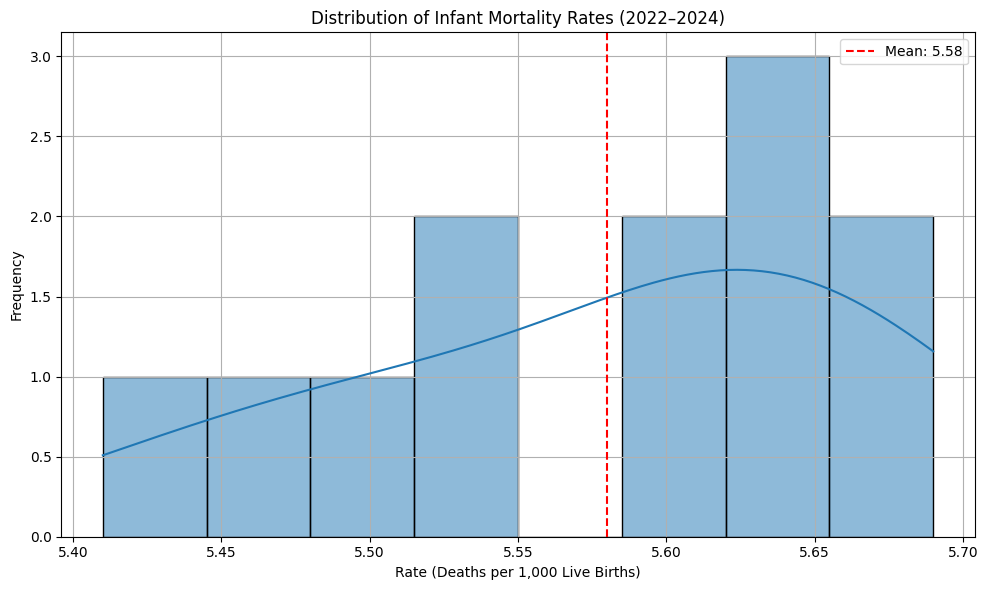

In [ ]:
# STEP 1: Upload the CSV file
from google.colab import files
uploaded = files.upload()

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress, ttest_1samp

# STEP 3: Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# STEP 4: Data Transformation
def convert_quarter_to_date(qstr):
    year, quarter = qstr.split()
    month = {"Q1": "01", "Q2": "04", "Q3": "07", "Q4": "10"}[quarter]
    return pd.to_datetime(f"{year}-{month}-01")

df["Date"] = df["Year and Quarter"].apply(convert_quarter_to_date)
df["Rate"] = pd.to_numeric(df["Rate"], errors="coerce")
df_filtered = df[df["Indicator"] == "Infant mortality"].copy()
df_filtered.dropna(subset=["Rate"], inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

# STEP 5: DESCRIPTIVE STATISTICS
print("📊 Descriptive Statistics (Infant Mortality Rate):")
print(df_filtered["Rate"].describe())

# Additional metrics
print("\nMedian:", df_filtered["Rate"].median())
print("Standard Deviation:", df_filtered["Rate"].std())

# STEP 6: INFERENTIAL STATISTICS

# One-sample t-test: Is the mean mortality rate significantly different from 5.0?
t_stat, p_val = ttest_1samp(df_filtered["Rate"], popmean=5.0)
mean_rate = df_filtered["Rate"].mean()
conf_int = stats.t.interval(
    0.95, len(df_filtered["Rate"])-1, loc=mean_rate, scale=stats.sem(df_filtered["Rate"])
)

print("\n🧪 Inferential Statistics (One-sample t-test):")
print(f"Mean Mortality Rate: {mean_rate:.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"95% Confidence Interval for Mean: {conf_int}")

# STEP 7: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered["Rate"], kde=True, bins=8)
plt.axvline(mean_rate, color='red', linestyle='--', label=f'Mean: {mean_rate:.2f}')
plt.title("Distribution of Infant Mortality Rates (2022–2024)")
plt.xlabel("Rate (Deaths per 1,000 Live Births)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
